# Class mapping exercise

#### Load python tools

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [3]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

### Election map
#### What percentage of vote did Biden/Trump receive in California counties?

In [4]:
# Values: https://raw.githubusercontent.com/stiles/notebooks/master/elections/data/ca_counties_election_results_2020.csv
# Geo: https://raw.githubusercontent.com/stiles/usc/main/data/geo/counties_simple.geojson

#### Read election results

In [5]:
election_df = pd.read_csv(
    "https://raw.githubusercontent.com/stiles/notebooks/master/elections/data/ca_counties_election_results_2020.csv",
    dtype={"county_fips": str},
)

In [6]:
election_df.head()

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,winner
0,California,001,Alameda,136309,617659,769864,-481350,0.177056,0.802296,0.625240,Biden
1,California,003,Alpine,244,476,741,-232,0.329285,0.642375,0.313090,Biden
2,California,005,Amador,13585,8153,22302,5432,0.609138,0.365573,0.243566,Trump
3,California,007,Butte,48730,50426,102042,-1696,0.477548,0.494169,0.016621,Biden
4,California,009,Calaveras,16518,10046,27164,6472,0.608084,0.369828,0.238257,Trump


#### Read county boundaries

In [7]:
ca_counties_gdf = gpd.read_file(
    "https://raw.githubusercontent.com/stiles/usc/main/data/geo/counties_simple.geojson",
    dtype={"county_fips": str},
)

In [8]:
ca_counties_gdf.head()

,county_name,county_fips,geometry
0,Alameda,001,"POLYGON ((-122.27125 37.90503, -122.27024 37.9..."
1,Alpine,003,"POLYGON ((-119.58667 38.71420, -119.58653 38.7..."
2,Amador,005,"POLYGON ((-120.07246 38.70276, -120.07249 38.6..."
3,Butte,007,"POLYGON ((-121.07661 39.59729, -121.07945 39.5..."
4,Calaveras,009,"POLYGON ((-120.01792 38.43586, -120.01788 38.4..."


#### Merge the two 

In [9]:
ca_counties_prez20 = pd.merge(
    ca_counties_gdf, election_df, on=["county_fips", "county_name"]
)

In [10]:
ca_counties_prez20.to_file(
    "../data/geo/president_county_results_2020.geojson", driver="GeoJSON"
)

---

### Vehicle map
##### What's the Tesla ownership rate by LA ZIP Codes?

In [11]:
# Values: https://raw.githubusercontent.com/stiles/notebooks/master/california-fuel-vehicles/output/tesla_zips_slim.csv
# Geo: https://raw.githubusercontent.com/stiles/notebooks/master/zips/data/processed/ca_zips_simple.geojson.json

#### Read Tesla data

In [12]:
tesla_df = pd.read_csv(
    "https://raw.githubusercontent.com/stiles/notebooks/master/california-fuel-vehicles/output/tesla_zips_slim.csv",
    dtype={"zip": str},
)

In [13]:
tesla_df.head()

,zip,name,teslas,all_vehicles,tesla_rate_1k,avg_house_income,avg_net_worth
0,90004,Los Angeles,200,22734,8.80,65893,232653
1,90005,Los Angeles,58,12518,4.63,53191,105569
2,90006,Los Angeles,26,17324,1.50,42242,39289
3,90007,Los Angeles,27,10707,2.52,38564,39966
4,90008,Los Angeles,54,12611,4.28,56286,284531


#### Read ZIP Codes geo file

In [14]:
zips_la_gdf = gpd.read_file(
    "https://raw.githubusercontent.com/stiles/notebooks/master/zips/data/processed/ca_zips.geojson"
)

In [15]:
zips_la_gdf.head()

,id,name,county_name,geometry
0,90001,Los Angeles,Los Angeles County,"POLYGON ((-118.24329 33.98901, -118.24754 33.9..."
1,90002,Los Angeles,Los Angeles County,"POLYGON ((-118.23085 33.95772, -118.23108 33.9..."
2,90003,Los Angeles,Los Angeles County,"MULTIPOLYGON (((-118.28268 33.98926, -118.2826..."
3,90004,Los Angeles,Los Angeles County,"MULTIPOLYGON (((-118.33852 34.06891, -118.3371..."
4,90005,Los Angeles,Los Angeles County,"POLYGON ((-118.31879 34.05514, -118.31852 34.0..."


#### Get rid of Catalina and San Clemente islands

In [16]:
exclude = ["90704", "90274"]

In [17]:
no_islands = zips_la_gdf[~zips_la_gdf["id"].isin(exclude)]

<AxesSubplot:>

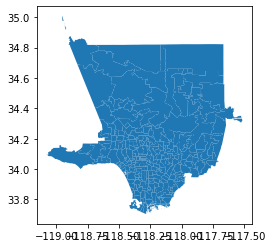

In [18]:
no_islands.plot()

In [19]:
no_islands.to_file("../data/geo/la_county_zips.geojson", driver="GeoJSON")

#### Merge the two

In [20]:
tesla_zips_gdf = pd.merge(
    no_islands, tesla_df, left_on="id", right_on="zip", how="left"
).fillna(0)

#### Export merged geo file

In [21]:
tesla_zips_gdf.to_file(
    "../data/geo/la_county_zips_tesla_rate.geojson", driver="GeoJSON"
)

---

### Population map
##### How's the white population distributed in LA by neighborhood? 

In [22]:
# Values:https://raw.githubusercontent.com/stiles/usc/main/data/processed/la_neighborhood_demographics.csv
# Geo: https://raw.githubusercontent.com/stiles/usc/main/data/geo/la-neighborhoods.geojson

#### Read race/ethnicity data

In [23]:
whites_la_df = pd.read_csv("../data/processed/la_neighborhood_demographics.csv")

In [24]:
whites_la_df.head()

,name,total_population,white_alone,black_alone,american_indian_and_alaska_native,asian_alone,native_hawaiian_and_pacific_islander,other_alone,two_or_more_races,latino_alone,asians_all,other_all,white_percent,black_percent,american_indian_percent,asian_percent,native_hawaiian_percent,other_percent,two_or_more_races_percent,latino_percent,asians_all_percent,other_all_percent,nonwhite_percent,majority_nonwhite,majority_white,majority_black,majority_american_indian_and_alaska_native,majority_asian,majority_native_hawaiian,majority_other,majority_two_or_more_races,majority_latino,median_householdincome,total_occupied_housing_units,owner_occupied,renter_occupied,owner_percent,renter_percent,majority_owner,majority_renter,majorityhigherthanmedianincomeLA
0,Acton,13533.0,3030.0,43.0,9.0,122.0,0.0,0.0,64.0,1019.0,123.0,73.0,22.39,0.32,0.07,0.90,0.00,0.00,0.47,7.53,0.91,0.54,77.61,True,False,False,False,False,False,False,False,False,99453.506605,1474.265218,1329.164851,145.100367,0.901578,0.098422,True,False,True
1,Adams-Normandie,37987.0,1455.0,3601.0,6.0,1622.0,62.0,32.0,273.0,11751.0,1683.0,311.0,3.83,9.48,0.02,4.27,0.16,0.08,0.72,30.93,4.43,0.82,96.17,True,False,False,False,False,False,False,False,False,37419.270130,5437.575802,1123.870291,4313.705512,0.206686,0.793314,False,True,False
2,Agoura Hills,27220.0,9337.0,415.0,0.0,1055.0,0.0,32.0,418.0,1548.0,1055.0,451.0,34.30,1.52,0.00,3.88,0.00,0.12,1.54,5.69,3.88,1.66,65.70,True,False,False,False,False,False,False,False,False,121211.788628,4675.116219,3311.101230,1364.014989,0.708239,0.291761,True,False,True
3,Agua Dulce,17982.0,3431.0,84.0,29.0,176.0,2.0,4.0,131.0,1025.0,179.0,164.0,19.08,0.47,0.16,0.98,0.01,0.02,0.73,5.70,0.99,0.91,80.92,True,False,False,False,False,False,False,False,False,108312.326136,1490.569409,1408.056410,82.512999,0.944643,0.055357,True,False,True
4,Alhambra,105896.0,3511.0,810.0,109.0,19403.0,191.0,149.0,773.0,15428.0,19594.0,1031.0,3.32,0.76,0.10,18.32,0.18,0.14,0.73,14.57,18.50,0.97,96.68,True,False,False,False,False,False,False,False,False,61884.537960,13840.151455,5937.368580,7902.782874,0.428996,0.571004,False,True,False


#### Read LA neighborhoods geo file

In [25]:
la_hoods_gdf = gpd.read_file(
    "https://raw.githubusercontent.com/stiles/usc/main/data/geo/la-neighborhoods.geojson"
)

In [26]:
la_hoods_gdf.head()

,name,slug,county,type,city,region,geometry
0,Vermont Square,vermont-square,los-angeles,Los Angeles,los-angeles,south-la,"POLYGON ((-118.28273 34.01114, -118.28207 34.0..."
1,Arlington Heights,arlington-heights,los-angeles,Los Angeles,los-angeles,central-la,"POLYGON ((-118.31672 34.05250, -118.31649 34.0..."
2,Bel-Air,bel-air,los-angeles,Los Angeles,los-angeles,westside,"POLYGON ((-118.46076 34.13033, -118.46068 34.1..."
3,Beverly Crest,beverly-crest,los-angeles,Los Angeles,los-angeles,westside,"POLYGON ((-118.45139 34.13176, -118.45116 34.1..."
4,Beverlywood,beverlywood,los-angeles,Los Angeles,los-angeles,westside,"POLYGON ((-118.39426 34.05244, -118.39317 34.0..."


#### Merge the two

In [27]:
la_hoods_race_gdf = pd.merge(la_hoods_gdf, whites_la_df, on="name")

In [30]:
la_hoods_race_gdf.head()

,name,slug,county,type,city,region,geometry,total_population,white_alone,black_alone,american_indian_and_alaska_native,asian_alone,native_hawaiian_and_pacific_islander,other_alone,two_or_more_races,latino_alone,asians_all,other_all,white_percent,black_percent,american_indian_percent,asian_percent,native_hawaiian_percent,other_percent,two_or_more_races_percent,latino_percent,asians_all_percent,other_all_percent,nonwhite_percent,majority_nonwhite,majority_white,majority_black,majority_american_indian_and_alaska_native,majority_asian,majority_native_hawaiian,majority_other,majority_two_or_more_races,majority_latino,median_householdincome,total_occupied_housing_units,owner_occupied,renter_occupied,owner_percent,renter_percent,majority_owner,majority_renter,majorityhigherthanmedianincomeLA
0,Vermont Square,vermont-square,los-angeles,Los Angeles,los-angeles,south-la,"POLYGON ((-118.28273 34.01114, -118.28207 34.0...",71469.0,983.0,13503.0,56.0,724.0,0.0,393.0,405.0,37246.0,724.0,854.0,1.38,18.89,0.08,1.01,0.00,0.55,0.57,52.11,1.01,1.19,98.62,True,False,False,False,False,False,False,False,True,41822.928950,14214.295664,4898.366783,9315.928882,0.344608,0.655392,False,True,False
1,Arlington Heights,arlington-heights,los-angeles,Los Angeles,los-angeles,central-la,"POLYGON ((-118.31672 34.05250, -118.31649 34.0...",44180.0,1196.0,3185.0,31.0,4509.0,49.0,12.0,323.0,12014.0,4558.0,367.0,2.71,7.21,0.07,10.20,0.11,0.03,0.73,27.19,10.32,0.83,97.29,True,False,False,False,False,False,False,False,False,42578.039781,7102.413584,1356.310928,5746.102656,0.190965,0.809035,False,True,False
2,Bel-Air,bel-air,los-angeles,Los Angeles,los-angeles,westside,"POLYGON ((-118.46076 34.13033, -118.46068 34.1...",36105.0,5237.0,206.0,0.0,673.0,0.0,0.0,464.0,285.0,674.0,465.0,14.50,0.57,0.00,1.87,0.00,0.00,1.29,0.79,1.87,1.29,85.50,True,False,False,False,False,False,False,False,False,200418.552607,2768.149731,2284.649012,483.500719,0.825334,0.174666,True,False,True
3,Beverly Crest,beverly-crest,los-angeles,Los Angeles,los-angeles,westside,"POLYGON ((-118.45139 34.13176, -118.45116 34.1...",33052.0,5576.0,126.0,0.0,332.0,0.0,0.0,128.0,247.0,332.0,128.0,16.87,0.38,0.00,1.00,0.00,0.00,0.39,0.75,1.00,0.39,83.13,True,False,False,False,False,False,False,False,False,181637.747622,2647.946141,2414.251796,233.694345,0.911745,0.088255,True,False,True
4,Beverlywood,beverlywood,los-angeles,Los Angeles,los-angeles,westside,"POLYGON ((-118.39426 34.05244, -118.39317 34.0...",29704.0,5527.0,128.0,0.0,490.0,0.0,8.0,156.0,462.0,490.0,164.0,18.61,0.43,0.00,1.65,0.00,0.03,0.53,1.56,1.65,0.55,81.39,True,False,False,False,False,False,False,False,False,131530.784216,2590.068534,1625.398241,964.670293,0.627550,0.372450,True,False,True


#### Export merged geo file

In [29]:
la_hoods_race_gdf.to_file("../data/geo/la_neighborhoods_race.geojson", driver="GeoJSON")